# Prev runs

In [ ]:
!pip install --upgrade nilearn

from nilearn.datasets import fetch_abide_pcp
# Fetching the full data
abide = fetch_abide_pcp(derivatives = ['rois_cc400'], pipeline = 'cpac', quality_checked = False)

y = abide.phenotypic['DX_GROUP']
y[y==2] = 0

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nilearn.connectome import ConnectivityMeasure
from sklearn.metrics import classification_report, confusion_matrix

conn_est = ConnectivityMeasure(kind = 'correlation', vectorize=True, discard_diagonal=True )
conn_matrices = conn_est.fit_transform(abide.rois_cc400)


In [ ]:
print(conn_matrices.shape)
print(y.shape)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(conn_matrices)

#Applying PCA
n_components = 1035
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)


explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance with {n_components} components: {explained_variance * 100:.2f}%")


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['auto', 'scale', 0.1, 1],
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(conn_matrices, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
best_svc = grid_search.best_estimator_


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['auto', 'scale', 0.1, 1],
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_reduced, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
best_svc = grid_search.best_estimator_

In [ ]:
X_reduced.shape
#(838, 76636)

In [ ]:
import time

# Recording start time
start_time = time.time()

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['auto', 'scale', 0.1, 1],
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(conn_matrices, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
best_svc = grid_search.best_estimator_

end_time = time.time()


elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")


In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['auto', 'scale', 0.1, 1],
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=10)
grid_search.fit(X_reduced, y)
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)
best_svc = grid_search.best_estimator_
end_time = time.time()


elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(conn_matrices, y, test_size=0.2, random_state=42)


svc = SVC(gamma='auto', C=1000, kernel='rbf')
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10)

# Voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)


voting_clf.fit(X_train, y_train)


y_pred = voting_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

svc = SVC(gamma='auto', C=1000, kernel='rbf')
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10)


voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=100)

svc = SVC(gamma='auto', C=1000, kernel='rbf')
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10)


voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(conn_matrices, y, test_size=0.2, random_state=100)

svc = SVC(gamma='auto', C=1000, kernel='rbf',probability = True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10, max_iter = 1000)


voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)


voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble Accuracy: {accuracy}")


Cross Val autism vs tdc

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svc = SVC(gamma='auto', C=1000, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10, max_iter = 1000)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross Val with whole set

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(gamma='auto', C=1000, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10, max_iter = 1000)


voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


svc = SVC(gamma='auto', C=1000, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=100, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=10, max_iter = 1000)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(voting_clf, conn_matrices, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


# Main Runs for Paper

## Whole Set

Whole Set Import, Connectivity matrix and PCA

In [ ]:
!pip install --upgrade nilearn

from nilearn.datasets import fetch_abide_pcp
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nilearn.connectome import ConnectivityMeasure
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Import
abide = fetch_abide_pcp(derivatives = ['rois_cc400'], pipeline = 'cpac', quality_checked = False)

y = abide.phenotypic['DX_GROUP']
y[y==2] = 0

conn_est = ConnectivityMeasure(kind = 'correlation', vectorize=True, discard_diagonal=True )
conn_matrices = conn_est.fit_transform(abide.rois_cc400)

#PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(conn_matrices)


n_components = 1035
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance with {n_components} components: {explained_variance * 100:.2f}%")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 51.1 MB/s eta 0:00:00

Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)


Explained Variance with 1035 components: 100.00%


CV Run for Conn_Matrices - WHOLE SET

Cross Validation of Ensembled with PCA

In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(gamma='auto', C=10, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=1, max_iter = 1000)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")


Cross-validation scores: [0.75       0.69230769 0.72115385 0.63461538 0.71153846 0.73786408
 0.7184466  0.74757282 0.77669903 0.68932039]
Mean Accuracy: 0.7180
Standard Deviation: 0.0377
Time elapsed: 66.68392038345337 seconds


ENSEMBLE - Without PCA

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(gamma='auto', C=10, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=1, max_iter = 1000)


voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, conn_matrices, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


SVM W PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=10, kernel='rbf')


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(svc, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

recall = cross_val_score(svc , X_reduced, y, scoring = 'recall',cv = cv, verbose = 1)
precision = cross_val_score(svc , X_reduced, y, scoring = 'precision',cv = cv, verbose = 1)

cross_recall = np.mean(recall)
cross_precision = np.mean(precision)

print("cross_recall:",cross_recall)
print("cross_precision:",cross_precision)

SVM W/o PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=10, kernel='rbf')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
cv_scores = cross_val_score(svc, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()


elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

recall = cross_val_score(svc , conn_matrices, y, scoring = 'recall',cv = cv, verbose = 1)
precision = cross_val_score(svc , conn_matrices, y, scoring = 'precision',cv = cv, verbose = 1)

cross_recall = np.mean(recall)
cross_precision = np.mean(precision)

print("cross_recall:",cross_recall)
print("cross_precision:",cross_precision)

Lin SVM w/ PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np
from sklearn.svm import SVC, LinearSVC


svc = linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(svc, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

recall = cross_val_score(svc , X_reduced, y, scoring = 'recall',cv = cv, verbose = 1)
precision = cross_val_score(svc , X_reduced, y, scoring = 'precision',cv = cv, verbose = 1)

cross_recall = np.mean(recall)
cross_precision = np.mean(precision)

print("cross_recall:",cross_recall)
print("cross_precision:",cross_precision)

Lin SVM w/o PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(svc, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

recall = cross_val_score(svc , conn_matrices, y, scoring = 'recall',cv = cv, verbose = 1)
precision = cross_val_score(svc , conn_matrices, y, scoring = 'precision',cv = cv, verbose = 1)

cross_recall = np.mean(recall)
cross_precision = np.mean(precision)

print("cross_recall:",cross_recall)
print("cross_precision:",cross_precision)

LR whole set with PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression(max_iter=1000, C=1, penalty='l2' )
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
cv_scores = cross_val_score(lr, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

LR whole set without PCA

In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np


lr = LogisticRegression(max_iter=1000, C=1, penalty='l2' )

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(lr, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Ridge whole set with PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import numpy as np


ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(ridge_classifier, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

 Ridge whole set without PCA

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import numpy as np

ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(ridge_classifier, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

## With 0,1

In [ ]:
!pip install --upgrade nilearn

from nilearn.datasets import fetch_abide_pcp
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nilearn.connectome import ConnectivityMeasure
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

abide = fetch_abide_pcp(derivatives = ['rois_cc400'], pipeline = 'cpac', quality_checked = False, DSM_IV_TR = [0,1])

y = abide.phenotypic['DX_GROUP']
y[y==2] = 0



conn_est = ConnectivityMeasure(kind = 'correlation', vectorize=True, discard_diagonal=True )
conn_matrices = conn_est.fit_transform(abide.rois_cc400)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(conn_matrices)
n_components = 838
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Explained Variance with {n_components} components: {explained_variance * 100:.2f}%")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 19.9 MB/s eta 0:00:00

Added README.md to /root/nilearn_data


Dataset created in /root/nilearn_data/ABIDE_pcp



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 729088 of 780083 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 557056 of 779970 bytes (71.4%,    0.4s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1198360 bytes (96.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1185453 bytes (97.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 983040 of 1204968 bytes (81.6%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1105920 of 1197415 bytes (92.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1201169 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1204224 of 1210503 bytes (99.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1245873 bytes (92.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1179558 bytes (97.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1190444 bytes (98.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1138688 of 1208867 bytes (94.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1032192 of 1192717 bytes (86.5%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1189522 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1208322 bytes (95.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1192754 bytes (96.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 983040 of 1191003 bytes (82.5%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1097728 of 1202751 bytes (91.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1181205 bytes (97.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1187395 bytes (97.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1239350 bytes (95.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1163264 of 1191923 bytes (97.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1233751 bytes (93.6%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1081344 of 1183497 bytes (91.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1253445 bytes (93.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1215285 bytes (95.0%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1204224 of 1221488 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1221937 bytes (94.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1097728 of 1183611 bytes (92.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1262014 bytes (91.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1184011 bytes (97.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1212178 bytes (95.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1208579 bytes (95.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1244950 bytes (95.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1188425 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1212603 bytes (95.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1253282 bytes (92.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1192509 bytes (96.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1146880 of 1184443 bytes (96.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 892928 of 1191841 bytes (74.9%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 606208 of 1184585 bytes (51.2%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 999424 of 1212706 bytes (82.4%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187792 of 1187792 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1189345 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 974848 of 1179095 bytes (82.7%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1190473 bytes (99.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1193089 bytes (96.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1199132 bytes (96.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1210365 bytes (95.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1186744 bytes (97.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1184279 bytes (97.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1187937 bytes (97.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1191386 bytes (97.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 901120 of 1181983 bytes (76.2%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1184524 bytes (98.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1197313 bytes (96.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1197162 bytes (96.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 958464 of 1186372 bytes (80.8%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1189947 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1190322 bytes (97.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1192667 bytes (96.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1185385 bytes (97.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1183750 bytes (97.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1138688 of 1182922 bytes (96.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1198650 bytes (96.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1114112 of 1190345 bytes (93.6%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1163264 of 1224656 bytes (95.0%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 860160 of 1193840 bytes (72.0%,    0.4s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1182103 bytes (97.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1183430 bytes (97.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1188554 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1179648 of 1216883 bytes (96.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1181437 bytes (97.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1191577 bytes (99.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1163264 of 1188427 bytes (97.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1196815 bytes (96.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1203717 bytes (96.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1097728 of 1188150 bytes (92.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 950272 of 1202599 bytes (79.0%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1181416 bytes (99.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 925696 of 1191721 bytes (77.7%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 1138688 of 1185544 bytes (96.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1201288 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1212952 bytes (95.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1163264 of 1190230 bytes (97.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1192700 bytes (96.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 966656 of 1188228 bytes (81.4%,    0.2s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1081344 of 1214010 bytes (89.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 573440 of 1189029 bytes (48.2%,    1.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1189679 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1200521 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1188275 bytes (97.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1229822 bytes (96.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1190329 bytes (98.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1181133 bytes (97.8%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1081344 of 1194911 bytes (90.5%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1192448 bytes (96.9%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1048576 of 1199970 bytes (87.4%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 991232 of 1178717 bytes (84.1%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1187389 bytes (97.3%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1190095 bytes (98.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1097728 of 1187431 bytes (92.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1194536 bytes (96.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1187854 bytes (97.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1048576 of 1185744 bytes (88.4%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1207616 bytes (95.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1081344 of 1187254 bytes (91.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1138688 of 1189232 bytes (95.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1185004 bytes (97.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1188250 bytes (97.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1200952 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1097728 of 1179456 bytes (93.1%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1188720 bytes (98.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1189409 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1198332 bytes (99.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1217690 bytes (94.9%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1187965 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1081344 of 1188821 bytes (91.0%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1114112 of 1188595 bytes (93.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1187807 bytes (98.6%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1185668 bytes (97.4%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 835584 of 952709 bytes (87.7%,    0.2s remaining) ...done. (2 seconds, 0 min)


Downloaded 901120 of 945584 bytes (95.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 835584 of 947673 bytes (88.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 917504 of 954705 bytes (96.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 950272 of 952944 bytes (99.7%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 933888 of 961614 bytes (97.1%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 958464 of 1238478 bytes (77.4%,    0.3s remaining) ...done. (2 seconds, 0 min)


Downloaded 1171456 of 1226095 bytes (95.5%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1221324 bytes (94.6%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (5 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1230523 bytes (93.9%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1288839 bytes (92.2%,    0.1s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1201279 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1219671 bytes (94.7%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 925696 of 1213840 bytes (76.3%,    0.3s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 638976 of 1239934 bytes (51.5%,    1.0s remaining) ...done. (2 seconds, 0 min)


Downloaded 1155072 of 1200445 bytes (96.2%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 958464 of 1248457 bytes (76.8%,    0.3s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1187840 of 1236805 bytes (96.0%,    0.0s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 1146880 of 1223048 bytes (93.8%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 909312 of 977600 bytes (93.0%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 884736 of 982835 bytes (90.0%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Downloaded 622592 of 705047 bytes (88.3%,    0.1s remaining) ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


Explained Variance with 838 components: 100.00%


In [ ]:
conn_matrices.shape

(838, 76636)

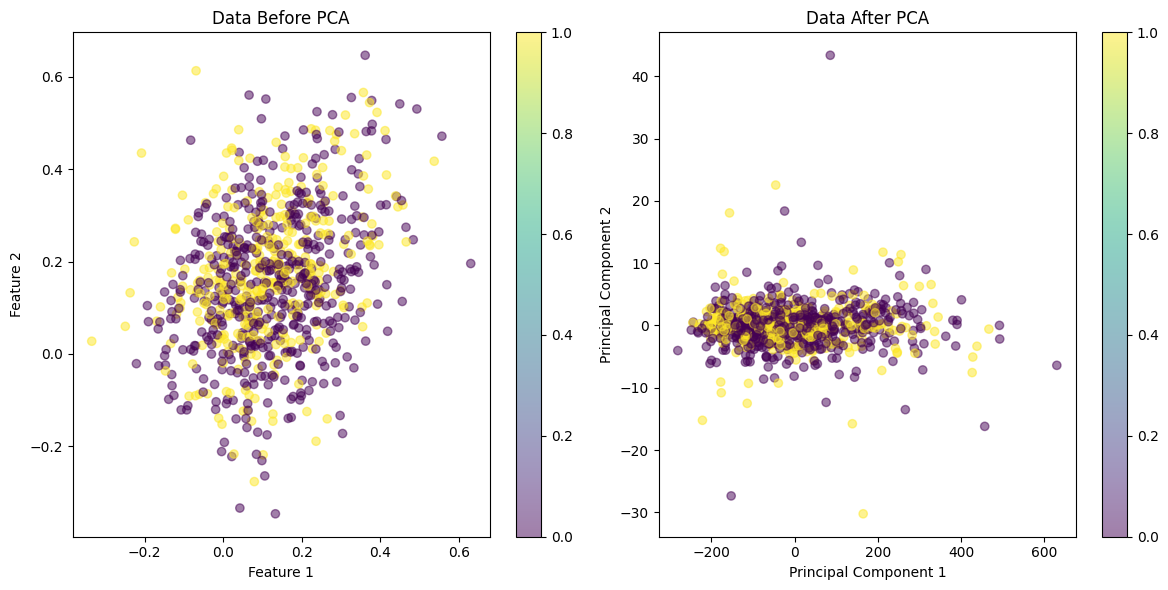

In [ ]:
import matplotlib.pyplot as plt

# Visualizing data before PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(conn_matrices[:, 0], conn_matrices[:, 830], c=y, cmap='viridis', alpha=0.5)
plt.title('Data Before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Visualizing data after PCA
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 8], c=y, cmap='viridis', alpha=0.5)
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

## Module Runs

Ensemble w pca

In [ ]:
import time

# Record start time
start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC( C=10, kernel='rbf')
linear_svc = LinearSVC(C=0.00001)
ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=1, max_iter = 1000)

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")


Cross-validation scores: [0.77380952 0.69047619 0.73809524 0.80952381 0.75       0.82142857
 0.72619048 0.71428571 0.71084337 0.78313253]
Mean Accuracy: 0.7518
Standard Deviation: 0.0416
Time elapsed: 9.89244270324707 seconds


Ensemble W/O PCA

In [ ]:
import time

# Record start time
start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svc = SVC(gamma='auto', C=10, kernel='rbf', probability=True)
linear_svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')
logistic_regression = LogisticRegression(C=1, max_iter = 1000)

voting_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('linear_svc', linear_svc),
        ('ridge_classifier', ridge_classifier),
        ('logistic_regression', logistic_regression)
    ],
    voting='hard'
)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(voting_clf, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")


Cross-validation scores: [0.75       0.71428571 0.71428571 0.78571429 0.71428571 0.79761905
 0.75       0.69047619 0.72289157 0.77108434]
Mean Accuracy: 0.7411
Standard Deviation: 0.0336
Time elapsed: 3325.4636039733887 seconds


SVC W/ PCA

In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=10, kernel='rbf')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(svc, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.76190476 0.64285714 0.67857143 0.72619048 0.72619048 0.79761905
 0.70238095 0.70238095 0.68674699 0.77108434]
Mean Accuracy: 0.7196
Standard Deviation: 0.0446
Time elapsed: 2.456608533859253 seconds


SVC Without PCA

In [ ]:
import time
start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = SVC(C=10, kernel='rbf')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(svc, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.73809524 0.67857143 0.70238095 0.72619048 0.72619048 0.79761905
 0.72619048 0.71428571 0.65060241 0.78313253]
Mean Accuracy: 0.7243
Standard Deviation: 0.0414
Time elapsed: 544.2217764854431 seconds


Linear SVC without PCA

In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np

svc = LinearSVC(C=0.001, penalty='l2', tol=0.0001)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(svc, conn_matrices, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.75       0.71428571 0.71428571 0.79761905 0.72619048 0.79761905
 0.75       0.71428571 0.71084337 0.77108434]
Mean Accuracy: 0.7446
Standard Deviation: 0.0326
Time elapsed: 394.45387601852417 seconds


Linear SVM With PCA

In [ ]:
import time

start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
import numpy as np


linear_svc = LinearSVC(C=0.001)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
cv_scores = cross_val_score(linear_svc, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.64285714 0.64285714 0.64285714 0.63095238 0.53571429 0.66666667
 0.63095238 0.61904762 0.56626506 0.62650602]
Mean Accuracy: 0.6205
Standard Deviation: 0.0374
Time elapsed: 8.51189661026001 seconds


lr with pca

In [ ]:
import time
start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression(max_iter=1000, C=1, penalty='l2' )
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

cv_scores = cross_val_score(lr, X_reduced, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.76190476 0.69047619 0.73809524 0.80952381 0.73809524 0.82142857
 0.73809524 0.71428571 0.71084337 0.78313253]
Mean Accuracy: 0.7506
Standard Deviation: 0.0408
Time elapsed: 1.0924122333526611 seconds


lr without pca


In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression(max_iter=1000, C=1, penalty='l2' )

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(lr, conn_matrices, y, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.76190476 0.71428571 0.72619048 0.79761905 0.72619048 0.82142857
 0.73809524 0.72619048 0.71084337 0.75903614]
Mean Accuracy: 0.7482
Standard Deviation: 0.0349
Time elapsed: 211.32965397834778 seconds


Ridge with pca

In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import numpy as np

ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(ridge_classifier, X_reduced, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)


print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()


elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.79761905 0.67857143 0.75       0.80952381 0.73809524 0.80952381
 0.77380952 0.72619048 0.73493976 0.78313253]
Mean Accuracy: 0.7601
Standard Deviation: 0.0400
Time elapsed: 1.7557721138000488 seconds


Ridge without pca


In [ ]:
import time


start_time = time.time()
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import RidgeClassifier, LogisticRegression
import numpy as np

ridge_classifier = RidgeClassifier(alpha=1000, tol=0.001, solver='auto')

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)


cv_scores = cross_val_score(ridge_classifier, conn_matrices, y, cv=cv, scoring='accuracy')


print("Cross-validation scores:", cv_scores)

print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

end_time = time.time()


elapsed_time = end_time - start_time
print(f"Time elapsed: {elapsed_time} seconds")

Cross-validation scores: [0.75       0.71428571 0.72619048 0.78571429 0.75       0.78571429
 0.76190476 0.71428571 0.69879518 0.77108434]
Mean Accuracy: 0.7458
Standard Deviation: 0.0295
Time elapsed: 43.74618935585022 seconds


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TESTS

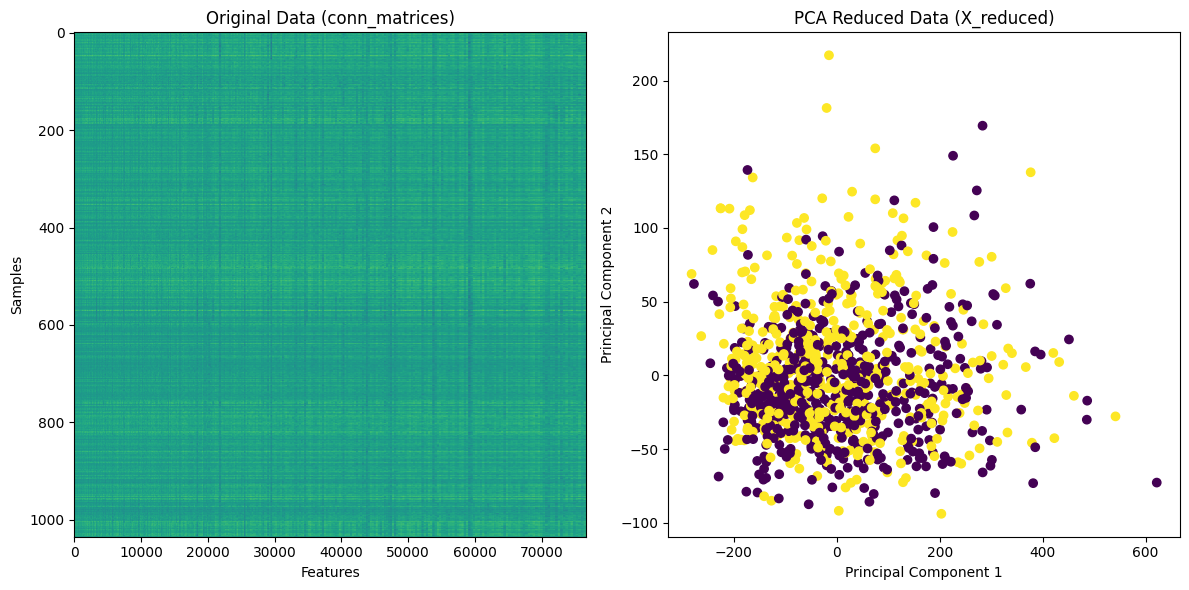

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(conn_matrices, aspect='auto', cmap='viridis')
plt.title('Original Data (conn_matrices)')
plt.xlabel('Features')
plt.ylabel('Samples')

# Visualize X_reduced
plt.subplot(1, 2, 2)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title('PCA Reduced Data (X_reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plots
plt.tight_layout()
plt.show()

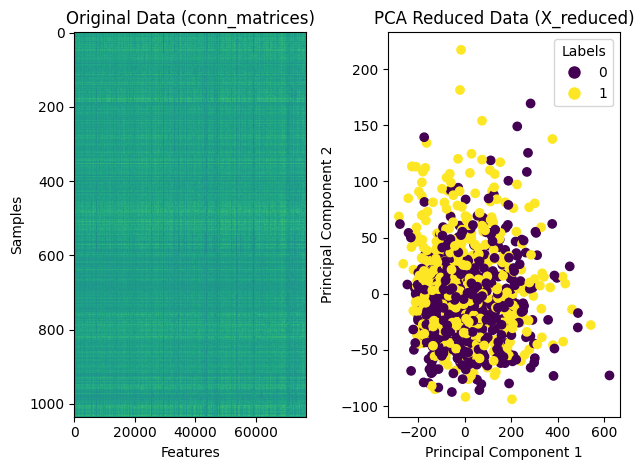

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(conn_matrices, aspect='auto', cmap='viridis')
plt.title('Original Data (conn_matrices)')
plt.xlabel('Features')
plt.ylabel('Samples')


plt.subplot(1, 2, 2)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')


plt.title('PCA Reduced Data (X_reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


legend_labels = np.unique(y)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels]
plt.legend(legend_handles, legend_labels, title='Labels')

# Show the plots
plt.tight_layout()
plt.show()

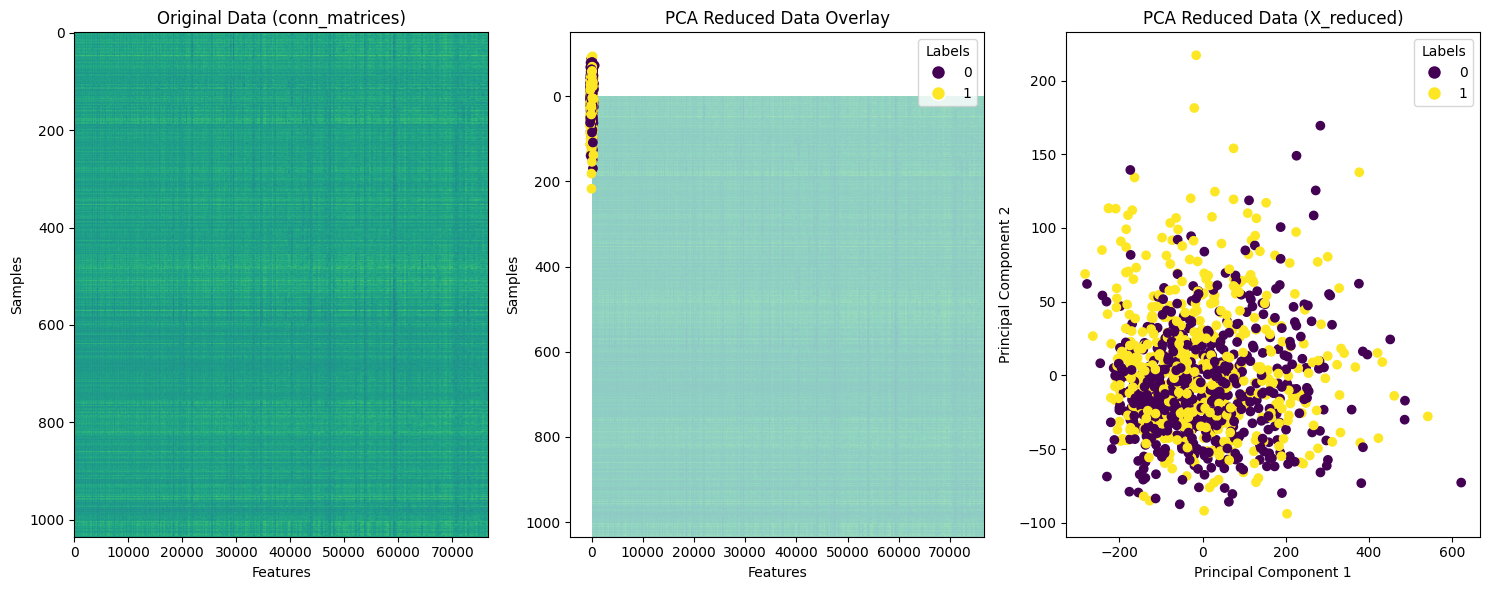

In [ ]:
plt.figure(figsize=(15, 6))

# Plot Original Data (conn_matrices)
plt.subplot(1, 3, 1)
plt.imshow(conn_matrices, aspect='auto', cmap='viridis')
plt.title('Original Data (conn_matrices)')
plt.xlabel('Features')
plt.ylabel('Samples')

# Plot PCA Reduced Data (X_reduced) overlaid on Original Data
plt.subplot(1, 3, 2)
plt.imshow(conn_matrices, aspect='auto', cmap='viridis', alpha=0.5)  # Overlay original data
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

# Add labels and title
plt.title('PCA Reduced Data Overlay')
plt.xlabel('Features')
plt.ylabel('Samples')

# Add legend
legend_labels = np.unique(y)
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in legend_labels]
plt.legend(legend_handles, legend_labels, title='Labels')

# Plot PCA Reduced Data (X_reduced) as scatter plot
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

# Add labels and title
plt.title('PCA Reduced Data (X_reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add legend
plt.legend(legend_handles, legend_labels, title='Labels')

# Show the plots
plt.tight_layout()
plt.show()